## Tutorial 2 - Autoencoder Continued Training

In this example, we will demonstrate how a model that has been pretrained can be continued to train with new data. This is useful when you have a model that has been trained on a large dataset, and you want to fine-tune it to a new dataset. BUT, we demonstrate that this is not always a good idea.

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image

### Load our pretrained model

In [8]:
pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [9]:
from tensorflow.keras.datasets import mnist

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


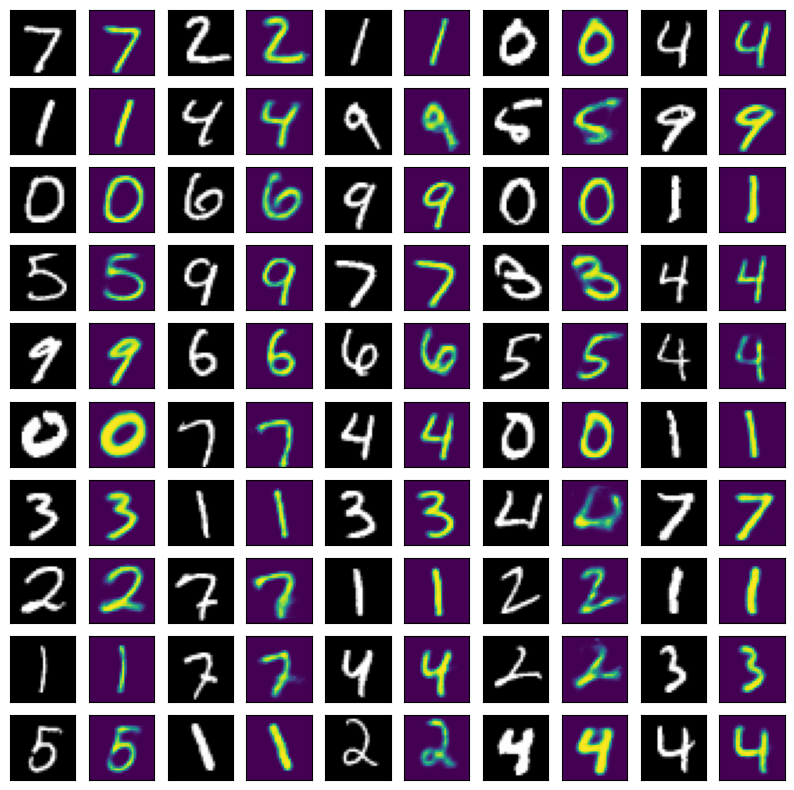

In [12]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Load our new symbol and test the autoencoder on this new symbol

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


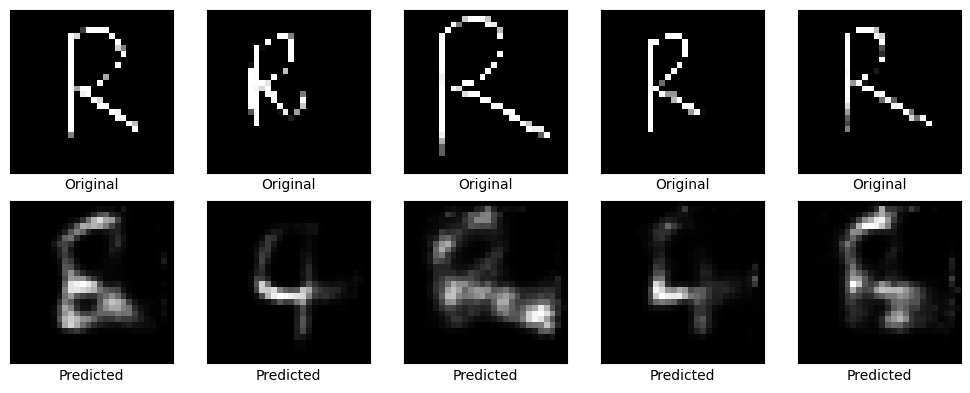

In [3]:
# Function to preprocess an image
def preprocess_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(28, 28), color_mode="grayscale")
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr / 255.0  # Normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    return np.array([input_arr])

# List of image paths
image_paths = ['testimg01.png', 'testimg02.png', 'testimg03.png', 'testimg04.png', 'testimg05.png']

# Predict and display each image
num_images = len(image_paths)
plt.figure(figsize=(10, 4))

for i, image_path in enumerate(image_paths, start=1):
    input_arr = preprocess_image(image_path)
    predictions = pretrained_model.predict(input_arr)

    plt.subplot(2, num_images, i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(input_arr.reshape(28, 28), cmap="gray")
    plt.xlabel('Original')

    plt.subplot(2, num_images, i + num_images)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[0].reshape(28, 28), cmap="gray")
    plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the five new images
your_images = []
for i in range(1, 6):
    img_path = f'testimg{i:02d}.png'  # Assuming image names are testimg01.png, testimg02.png, ..., testimg05.png
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    your_images.append(img)

# Oversample the images to obtain a total of 200 images
num_oversamples = 200 // len(your_images)
oversampled_images = np.concatenate([np.repeat(img[np.newaxis, ...], num_oversamples, axis=0) for img in your_images], axis=0)

# Ensure the total number of images is exactly 200
oversampled_images = oversampled_images[:200]

print(oversampled_images.shape)  # Should print (200, 28, 28, 1) if images are resized to 28x28 grayscale

(200, 28, 28, 1)


In [26]:
# Reshape MNIST dataset images to match the shape of oversampled images
train_images_reshaped = train_images.reshape((-1, 28, 28, 1))

# Combine your images with MNIST dataset
train_images_combined = np.concatenate([train_images_reshaped, oversampled_images], axis=0)

In [27]:
# Reshape MNIST dataset images to match the expected input shape of the model
train_images_reshaped = train_images.reshape((-1, 784))
test_images_reshaped = test_images.reshape((-1, 784))

In [29]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# Define autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create autoencoder model
autoencoder = Model(input_img, decoded)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder with combined dataset
# Train autoencoder with combined dataset
autoencoder.fit(train_images_reshaped, train_images_reshaped,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images_reshaped, test_images_reshaped))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3421 - val_loss: 0.1637
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1553 - val_loss: 0.1332
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1316 - val_loss: 0.1225
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1219 - val_loss: 0.1150
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1158 - val_loss: 0.1101
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1106 - val_loss: 0.1059
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1070 - val_loss: 0.1033
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1044 - val_loss: 0.1016
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1027 - val_loss: 0.0997
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1009 - val_loss: 0.0983
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0995 - val_loss: 0.0973
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

ValueError: as_list() is not defined on an unknown TensorShape.

As we can, this autoencoder doesn't do a good job with this new symbol.

### Continue training the pretrained autoencoder with only the new symbol

In [19]:
input_arr = input_arr.reshape(784)

new_images = [input_arr for _ in range(200)]

new_images = np.array(new_images)
new_images.shape

(100, 784)

In [20]:
from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')
from tensorflow.keras.optimizers.legacy import * 

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

pretrained_model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = pretrained_model.fit(
    x=new_images, # For autoencoders, both the input and the target are the same
    y=new_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images, new_images),
    callbacks=[early_stop]
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1502 - val_loss: 0.7810
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7810 - val_loss: 0.6150
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.6150 - val_loss: 0.5470
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.5470 - val_loss: 0.5399
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5399 - val_loss: 0.5438
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5438 - val_loss: 0.5355
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5355 - val_loss: 0.5205
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5205 - val_loss: 0.5101
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5101 - val_loss: 0.5016
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5016 - val_loss: 0.4885


### Explore the performance of the autoencoder on the new symbol

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
(1, 784)


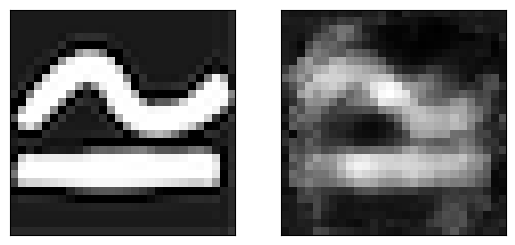

In [21]:
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can see, the updated autoencoder does a much better job with the new symbol!

### Test how our model does on the original 10 digits

Load the original 10 digits dataset and test the autoencoder on them.

In [22]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


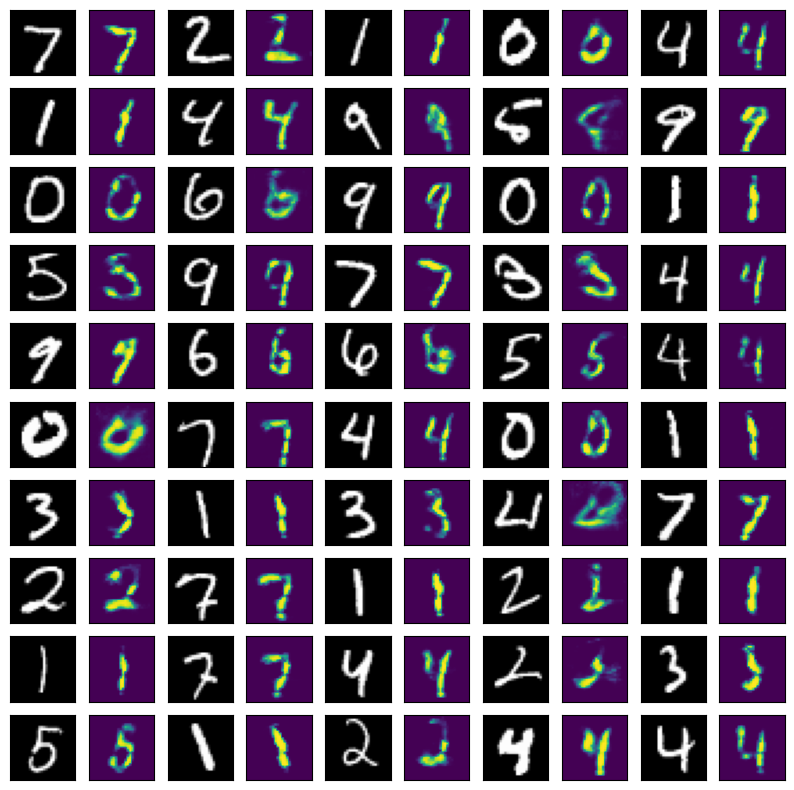

In [23]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

**What happened here!** This is **'catastrohpic forgetting'** -- the model has forgotten how to reconstruct the MNIST digits. This is because the model was trained on the test images, and not the MNIST images. 